In [ ]:
cd ..

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Changing to Step Function

In [3]:
import pandas as pd
df_all = pd.read_csv("interventionFootprintByState.csv",index_col=0)

In [4]:
tseries = df_all.pivot(index="State",columns='dateBefore',values="interventionFootprint")
tseries[tseries.columns.min()] = tseries[tseries.columns.min()].fillna(0)
tseries[tseries.columns.max()] = tseries[tseries.columns.max()].fillna(tseries.max(axis=1))

In [5]:
tseries.head()

dateBefore,2020-02-28,2020-02-29,2020-03-01,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,...,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-28
State,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.000000
Alaska,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.878737
Arizona,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
Arkansas,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000
California,0.0,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [6]:
tseries.columns.astype(pd.DatetimeIndex)

Index(['2020-02-28', '2020-02-29', '2020-03-01', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
       '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15',
       '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
       '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
       '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
       '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-28'],
      dtype='object', name='dateBefore')

In [7]:
tseries.columns = pd.DatetimeIndex(tseries.columns)

In [8]:
# tseries.interpolate?

In [9]:
tseries = tseries.interpolate('zero',axis=1)

In [10]:
tseries.head()

dateBefore,2020-02-28,2020-02-29,2020-03-01,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,...,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-28
State,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.820771,0.820771,0.820771,0.820771,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.878737,0.878737,0.878737,0.878737,0.878737,0.878737,0.878737,0.878737,0.878737,0.878737
Arizona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000
California,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
tseries4plot = tseries.transpose().melt()
series = []
for state in tseries4plot.State.unique():
    series.extend(range(40))
index = pd.Series(series)
tseries4plot["index"]=index

In [12]:
tseries4plot

,State,value,index
0,Alabama,0.000000,0
1,Alabama,0.000000,1
2,Alabama,0.000000,2
3,Alabama,0.000000,3
4,Alabama,0.000000,4
...,...,...,...
1995,Wyoming,0.435137,35
1996,Wyoming,0.435137,36
1997,Wyoming,0.435137,37
1998,Wyoming,0.435137,38


In [13]:
import altair as alt

In [14]:
chart = alt.Chart(tseries4plot).mark_line().encode(
        x = alt.X("index"),
        y = alt.Y("value", scale=alt.Scale(0,1)),
        facet=alt.Facet('State:O', columns=4),
    )
chart.properties(width=150,height=100,title="Step-Function Curve").interactive()

alt.Chart(...)

In [15]:
from sklearn.cluster import AgglomerativeClustering

num_clusters = 4
clustering = AgglomerativeClustering(n_clusters=num_clusters)
clustering.fit(tseries.values)
labels = pd.Series(clustering.labels_,name="Cluster")
labels.value_counts()

0    25
1    11
3     7
2     7
Name: Cluster, dtype: int64

In [16]:
y_predict = clustering.fit_predict(tseries.values)

In [17]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()
clf.fit(tseries.values, y_predict)
# print(clf.centroids_)

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


NearestCentroid(metric='euclidean', shrink_threshold=None)

In [18]:
clustResult = pd.DataFrame(tseries.index)
clustResult["cluster"] = labels

tseries4plot_clust = tseries4plot.merge(clustResult)

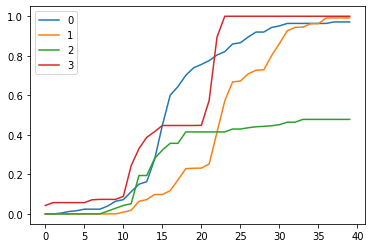

In [19]:
for idx,centroid in enumerate(clf.centroids_):
#     plt.figure()
    plt.plot(centroid,label=idx)
    plt.legend()

In [20]:
# mapOriginal2InferredCentroid = {0:1,1:0,2:2,3:3}
mapOriginal2InferredCentroid = {0:0,1:1,2:2,3:3}

In [21]:
for idx,centroid in enumerate(clf.centroids_):
    origClust= mapOriginal2InferredCentroid[idx]
    stateLst = list(clustResult[clustResult["cluster"]==idx].State)
    print (f"Cluster {idx}:{stateLst}")

Cluster 0:['Alaska', 'Arizona', 'California', 'Colorado', 'Florida', 'Hawaii', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Maryland', 'Massachusetts', 'Minnesota', 'Montana', 'Nevada', 'New Hampshire', 'New Jersey', 'North Carolina', 'North Dakota', 'Ohio', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Vermont']
Cluster 1:['Alabama', 'Georgia', 'Idaho', 'Maine', 'Mississippi', 'Missouri', 'New Mexico', 'Oklahoma', 'Tennessee', 'Texas', 'Virginia']
Cluster 2:['Arkansas', 'Connecticut', 'Iowa', 'Nebraska', 'South Dakota', 'Utah', 'Wyoming']
Cluster 3:['Delaware', 'Michigan', 'New York', 'Oregon', 'Washington', 'West Virginia', 'Wisconsin']


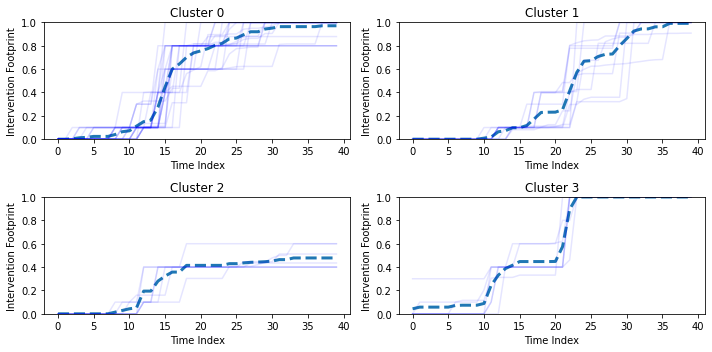

In [22]:
fig, axs = plt.subplots(2, 2,figsize=(10,5))
for idx,centroid in enumerate(clf.centroids_):
    ax = axs.flat[idx]
    origClust= mapOriginal2InferredCentroid[idx]
    stateLst = list(clustResult[clustResult["cluster"]==origClust].State)
    ax.plot(centroid,linewidth=3,linestyle='--')
    for state in stateLst:
        state_df = tseries4plot_clust[tseries4plot_clust["State"]==state]
        ax.plot(state_df["index"],state_df["value"],color="blue",alpha=0.1)
    ax.set_title(f"Cluster {origClust}")
    ax.set_ylim(0,1)
    ax.set_ylabel("Intervention Footprint")
    ax.set_xlabel("Time Index")
#     plt.title(stateLst)
plt.tight_layout()
# plt.ylabel("Intervention Footprint")

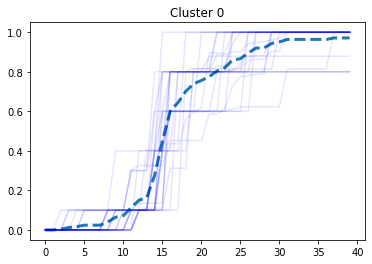

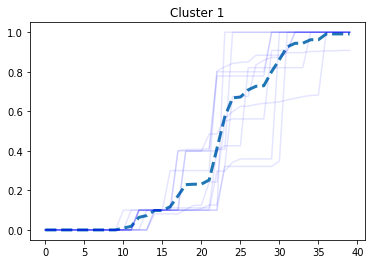

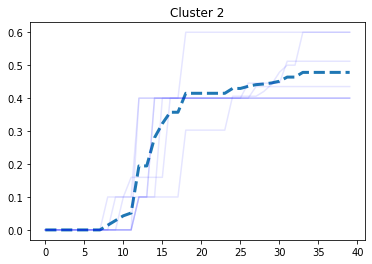

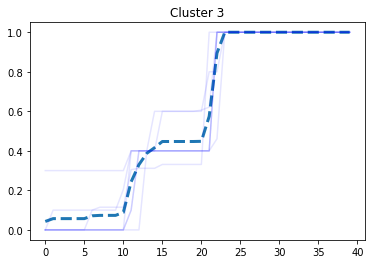

In [23]:
for idx,centroid in enumerate(clf.centroids_):
    origClust= mapOriginal2InferredCentroid[idx]
    stateLst = list(clustResult[clustResult["cluster"]==origClust].State)
    plt.figure()
    plt.plot(centroid,linewidth=3,linestyle='--')
    for state in stateLst:
        state_df = tseries4plot_clust[tseries4plot_clust["State"]==state]
        plt.plot(state_df["index"],state_df["value"],color="blue",alpha=0.1)
    plt.title(f"Cluster {origClust}")
#     plt.title(stateLst)

In [24]:
clustResult = pd.DataFrame(tseries.index)
clustResult["cluster"] = labels

tseries4plot_clust = tseries4plot.merge(clustResult)

In [25]:
chart = alt.Chart(tseries4plot_clust).mark_line().encode(
        x = alt.X("index"),
        y = alt.Y("value", scale=alt.Scale(0,1)),
        facet=alt.Facet('State:O', columns=5),
        color=alt.Color("cluster",type="nominal")
    )
chart.properties(width=150,height=100,title="Step-Function Curve").interactive()

alt.Chart(...)